In [34]:
import numpy as np
import pandas as pd
import os
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
queries3_file = '/run/media/root/Windows/Users/agnes/Downloads/data/msmarco/queries3.csv'

df = pd.read_csv(queries3_file)

In [12]:
len(set(df['qid']))

5152

In [13]:
len(df)

206080

In [18]:
df[df['qid'] == 0]['type'].value_counts()

original          16
degree_3           4
degree_8           4
degree_4           4
degree_8_split     4
degree_4_split     4
degree_2           4
Name: type, dtype: int64

In [20]:
df[(df['qid'] == 0) & (df['type'] == 'original')]['rel'].value_counts()

0    15
1     1
Name: rel, dtype: int64

In [21]:
6*4

24

In [24]:
split_data_fn = '/run/media/root/Windows/Users/agnes/Downloads/data/msmarco/train_data/queries3_split.csv'

df = pd.read_csv(split_data_fn)

In [28]:
sum(df['type'] == 'train')

4602

In [29]:
sum(df['type'] == 'dev')

150

In [30]:
sum(df['type'] == 'test')

400

In [103]:
train_data_regression_folder = '/run/media/root/Windows/Users/agnes/Downloads/data/msmarco/train_data/splitted/queries3_sentences_regression'

train_data = pd.read_csv(os.path.join(train_data_regression_folder, 'queries3_sentences_regression_train.csv'))
dev_data = pd.read_csv(os.path.join(train_data_regression_folder, 'queries3_sentences_regression_dev.csv'))
test_data = pd.read_csv(os.path.join(train_data_regression_folder, 'queries3_sentences_regression_test.csv'))

In [104]:
len(train_data)

488047

In [105]:
len(dev_data)

16259

In [106]:
len(test_data)

42395

In [107]:
ev_dir = '/run/media/root/Windows/Users/agnes/Downloads/data/msmarco/train_results/test_model_5/model_lre06_not_od_checkpoint1'


df_eval_1 = pd.read_csv(os.path.join(ev_dir, 'binary_similarity_evaluation_results.csv'))
df_eval_2 = pd.read_csv(os.path.join(ev_dir, 'similarity_evaluation_results.csv'))
df_eval_2 = df_eval_2.drop(['epoch'], axis=1)
eval_dfs = pd.concat([df_eval_1, df_eval_2], axis=1).reset_index(drop=True)
eval_dfs = eval_dfs.drop(['steps'], axis=1)

In [108]:
eval_dfs

,epoch,cosine_acc,euclidean_acc,manhattan_acc,cosine_pearson,cosine_spearman,euclidean_pearson,euclidean_spearman,manhattan_pearson,manhattan_spearman,dot_pearson,dot_spearman
0,0,0.640000,0.622667,0.626667,0.342417,0.331474,0.342879,0.324662,0.342022,0.325296,0.330066,0.324050
1,1,0.641000,0.616667,0.627333,0.345018,0.335902,0.345475,0.327516,0.344742,0.328443,0.332524,0.327361
2,2,0.640333,0.614000,0.627333,0.347633,0.339833,0.348327,0.331057,0.347709,0.332987,0.335024,0.330401
3,3,0.641000,0.636667,0.644000,0.351298,0.345199,0.352336,0.336262,0.351830,0.338459,0.338548,0.334799
4,4,0.650667,0.634333,0.646333,0.355733,0.350420,0.357464,0.342831,0.357113,0.345350,0.342921,0.341757
...,...,...,...,...,...,...,...,...,...,...,...,...
89,89,0.704667,0.687333,0.694333,0.450536,0.443723,0.456514,0.443125,0.468385,0.463999,0.451089,0.445821
90,90,0.700667,0.701333,0.681667,0.445190,0.446441,0.454228,0.444495,0.451418,0.443374,0.446240,0.447474
91,91,0.698667,0.705333,0.682667,0.448790,0.447234,0.455953,0.446972,0.458274,0.451133,0.449536,0.447766
92,92,0.701333,0.701333,0.686667,0.441688,0.439032,0.448221,0.440223,0.444121,0.443321,0.442836,0.439765


In [109]:
eval_dfs_melted = pd.melt(eval_dfs, id_vars=['epoch'], var_name='metric',
                         value_name='score', value_vars=['cosine_acc', 'cosine_pearson'])

In [110]:
eval_dfs_melted.head()

,epoch,metric,score
0,0,cosine_acc,0.640000
1,1,cosine_acc,0.641000
2,2,cosine_acc,0.640333
3,3,cosine_acc,0.641000
4,4,cosine_acc,0.650667


Text(0.5, 1.0, 'development set performance')

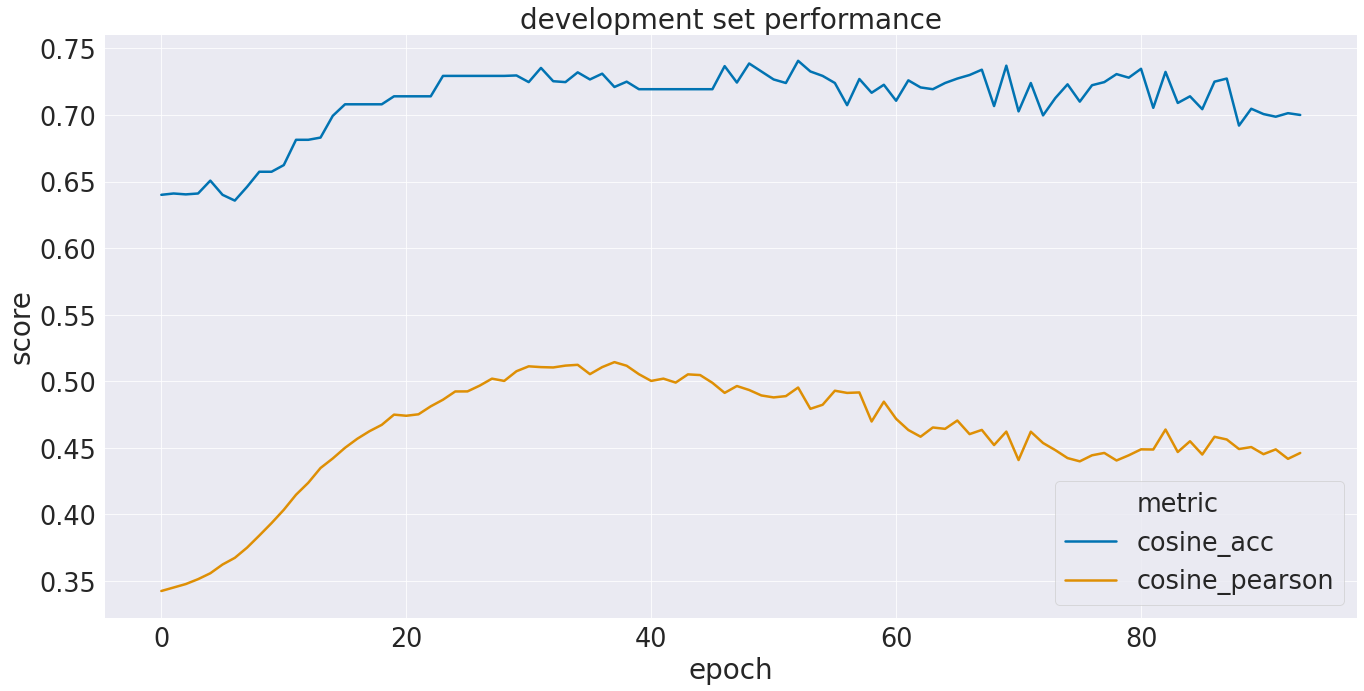

In [113]:
plt.style.use('fivethirtyeight')
sns.set(style="whitegrid")
sns.set(font_scale=5)
sns.set(palette="colorblind")
sns.set_context("paper", font_scale=2.9, rc = {'lines.linewidth': 2.5, 'lines.markersize': 3.5})

plt.figure(figsize=(20,10))
sns.lineplot(data=eval_dfs_melted, x='epoch', y='score',hue='metric', err_style='bars')
plt.title('development set performance')

In [115]:
31000 / 488047 * 100

6.351847260612195

In [123]:
queries3_file = '/run/media/root/Windows/Users/agnes/Downloads/data/msmarco/queries3.csv'

df = pd.read_csv(queries3_file)

In [124]:
df.head(3)

,qid,query,rel,type,doc
0,0,aaa a common cause of a skid is,0,original,Discounts and benefits are available at all He...
1,0,aaa a common cause of a skid is,0,original,AAA North Penn provides Authorized On - Line P...
2,0,aaa a common cause of a skid is,0,original,â¢ EAP-TLS authentication takes place between...


In [125]:
df = df.head(10000)

In [134]:
df['nr. tokens'] = df['doc'].apply(lambda x: len(nltk.word_tokenize(x)))
df['nr. sentences'] = df['doc'].apply(lambda x: len(nltk.tokenize.sent_tokenize(x)))


In [135]:
df.head(3)

,qid,query,rel,type,doc,doc_nr_tokens,doc_nr_sentences,nr. tokens,nr. sentences
0,0,aaa a common cause of a skid is,0,original,Discounts and benefits are available at all He...,59,4,59,4
1,0,aaa a common cause of a skid is,0,original,AAA North Penn provides Authorized On - Line P...,55,4,55,4
2,0,aaa a common cause of a skid is,0,original,â¢ EAP-TLS authentication takes place between...,51,3,51,3


In [143]:
df_melted = df.melt(id_vars=['type'], value_vars=['nr. tokens', 'nr. sentences'],
               var_name='length type', value_name='length')

In [146]:
df_melted.head(3)

,type,length type,length
0,original,nr. tokens,59
1,original,nr. tokens,55
2,original,nr. tokens,51


Text(0.5, 0, 'document type')

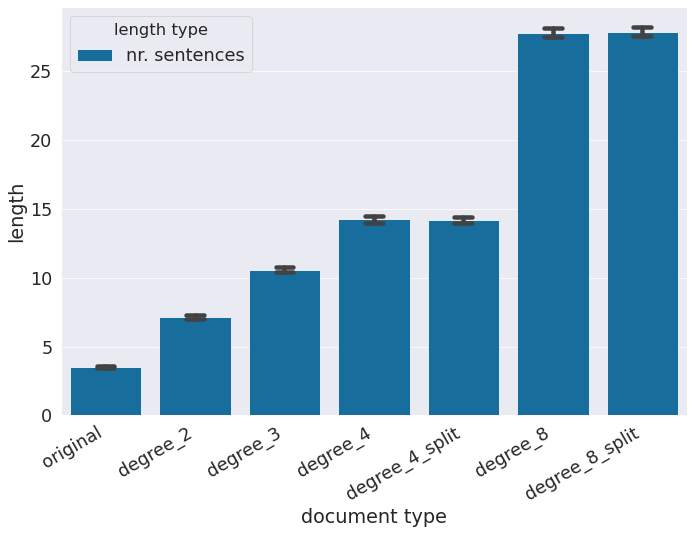

In [161]:
plt.figure(figsize=(10,7))


plt.style.use('fivethirtyeight')
sns.set(style="whitegrid")
sns.set(font_scale=2)
sns.set(palette="colorblind")
sns.set_context("paper", font_scale=2, rc = {'lines.linewidth': 2.5, 'lines.markersize': 3.5})

ax = sns.barplot(data=df_melted, x='type', y='length', hue='length type', hue_order=['nr. sentences'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, horizontalalignment='right')
ax.set_xlabel('document type')

[Text(0, 0, 'original'),
 Text(0, 0, 'degree_2'),
 Text(0, 0, 'degree_3'),
 Text(0, 0, 'degree_4'),
 Text(0, 0, 'degree_4_split'),
 Text(0, 0, 'degree_8'),
 Text(0, 0, 'degree_8_split')]

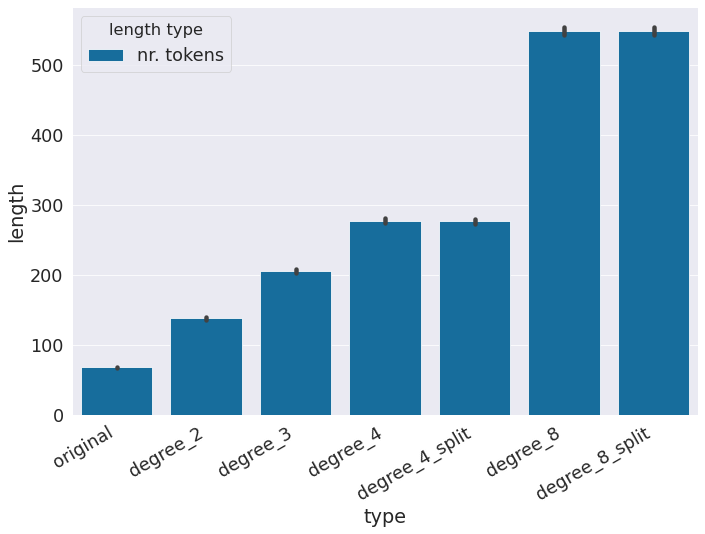

In [158]:
plt.figure(figsize=(10,7))


plt.style.use('fivethirtyeight')
sns.set(style="whitegrid")
sns.set(font_scale=2)
sns.set(palette="colorblind")
sns.set_context("paper", font_scale=2, rc = {'lines.linewidth': 2.5, 'lines.markersize': 3.5})

ax = sns.barplot(data=df_melted, x='type', y='length', hue='length type', hue_order=['nr. tokens'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, horizontalalignment='right')


In [162]:
60/24

2.5

In [167]:
31/2.5

12.4